In [149]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)



2.14.0


## Load the Data

In [150]:
X = tf.constant([20, 23, 25, 28, 30, 37, 40, 43, 46])
y = tf.constant([45, 51, 55, 61, 65, 79, 85, 91, 97])

## Shape the Data

In [151]:
X.shape

TensorShape([9])

In [152]:
X = tf.expand_dims(X, axis=1)
X.shape

TensorShape([9, 1])

## Visualize the Data

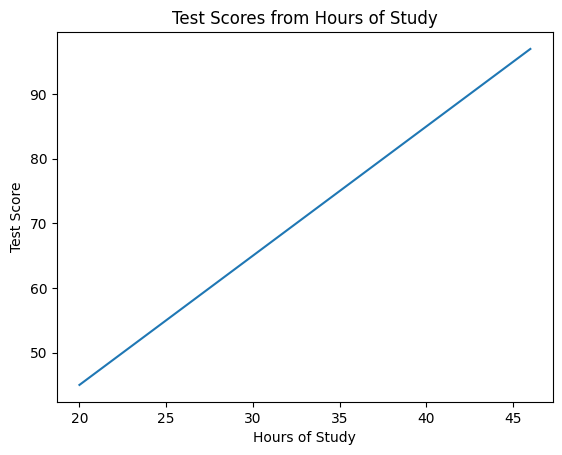

In [153]:
def line_plot(X, y, xlabel='', ylabel='', title=''):
  plt.plot(X, y)
  if xlabel: plt.xlabel(xlabel)
  if ylabel: plt.ylabel(ylabel)
  if title: plt.title(title)
  plt.show()

line_plot(X, y, 'Hours of Study', 'Test Score', 'Test Scores from Hours of Study')


## Build the Model


In [154]:
def build_ANN(input_shape, layers=[10]):
  model = Sequential()
  for index, units in enumerate(layers):
    print(units, index)
    if index == 0:
      model.add(Dense(units=units, input_shape=input_shape))
    else:
      model.add(Dense(units=units))
  return model

def run_model(model, X_train, y_train, outputs=1, epochs=100, X_validate=None, y_validate=None, verbose=0, loss='default', optimizer='default', plot_loss=True, plot_accuracy=True):
  # assign loss
  if loss == 'default':
    if outputs == 1:
      loss = 'mean_squared_error'
    else:
      loss = 'categorical_crossentropy'

  # assign optimizer
  if optimizer == 'default':
    optimizer = 'adam'

  num_layers = len(model.layers)

  # add output layer
  if outputs == 1:
    if num_layers > 0:
      model.add(Dense(units=1))
    else:
      model.add(Dense(units=1, input_shape=X_train[0].shape))

  # compile
  model.compile(optimizer=optimizer, loss=loss)

  # fit
  if (X_validate is not None) and (y_validate is not None):
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validate, y_validate), verbose=verbose)
  else:
    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose)

  # Plot Loss
  if plot_loss:
    if (X_validate is not None) and (y_validate is not None):
      print(history.history.keys())
    else:
      #print(history.history.keys())
      # Lets plot the loss
      plt.plot(history.history['loss'])
      plt.title('Model loss')
      plt.ylabel('Loss')
      plt.xlabel('Number of epochs')
      plt.legend(['loss plot'], loc='upper right')
      plt.show()

  return model, history

def get_prediction(model, input, outputs=1):
  if outputs == 1:
    return model.predict(input)[0][0]
  else:
    return False


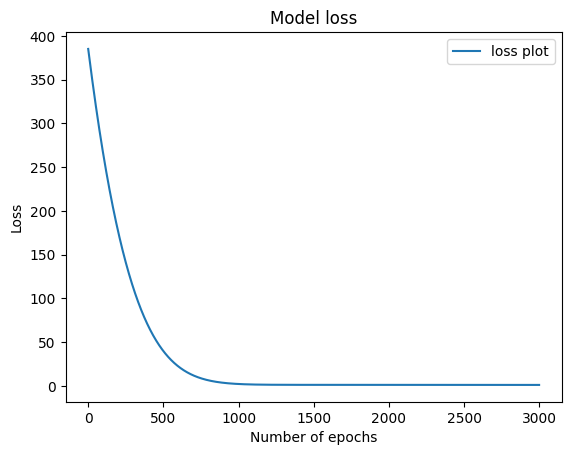

In [155]:
model = build_ANN(X[0].shape, [])
model, history = run_model(model, X, y, outputs=1, epochs=3000, verbose=0)

In [156]:
num_hours = [38]
predicted_score = get_prediction(model, num_hours, outputs=1)
print(f'Predicted score for {num_hours} hours of study: {predicted_score}')

1/1 [==============================] - 0s 60ms/step
Predicted score for [38] hours of study: 81.3974380493164
